In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import yfinance as yf
import warnings                     
warnings.filterwarnings('ignore')

In [3]:
start_date = datetime(2023,1,1)
end_date = datetime(2023,12,31)

In [4]:
prices = yf.download('HDFCBANK.NS',start = start_date,end = end_date)


[*********************100%%**********************]  1 of 1 completed


In [5]:
prices.asfreq(pd.infer_freq(prices.index))

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1627.000000,1639.750000,1618.550049,1628.699951,1610.234009,2190689.0
2023-01-03,1622.199951,1643.000000,1622.199951,1639.349976,1620.763184,4189015.0
2023-01-04,1635.000000,1645.750000,1607.000000,1610.050049,1591.795532,5175800.0
2023-01-05,1615.000000,1618.050049,1589.400024,1599.699951,1581.562744,5470718.0
2023-01-06,1602.000000,1609.099976,1578.199951,1594.400024,1576.322876,4546231.0
...,...,...,...,...,...,...
2023-12-25,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-26,1673.250000,1685.949951,1668.550049,1682.449951,1682.449951,9022928.0
2023-12-27,1681.500000,1706.500000,1678.599976,1703.300049,1703.300049,13504539.0


In [6]:
prices.to_csv('prices.csv')

In [7]:
def plot_true(prices,term):
    plt.figure(figsize=(10, 6))
    plt.plot(prices)
    plt.title('HDFCBANK', fontsize=16)
    plt.ylabel('{}'.format(term), fontsize=14)
    for month in range(start_date.month,1+end_date.month):
        plt.axvline(pd.to_datetime('2023' + '-' + str(month) + '-01'), color='k', linestyle='--', alpha=0.2)
    plt.axhline(prices.mean(), color='r', alpha=0.2, linestyle='--')
    plt.show()

## First Diff

In [8]:
def diff1(prices):
    first_diff = prices.diff()[1:]
    return first_diff

In [9]:
def plot_diff1(first_diff,term):
    plt.figure(figsize=(10, 6))
    plt.plot(first_diff)
    plt.title('HDFCBANK', fontsize=16)
    plt.ylabel('{}'.format(term), fontsize=14)
    for month in range(start_date.month,1+end_date.month):
        plt.axvline(pd.to_datetime('2023' + '-' + str(month) + '-01'), color='k', linestyle='--', alpha=0.2)
    plt.axhline(first_diff.mean(), color='r', alpha=0.2, linestyle='--')
    plt.show()

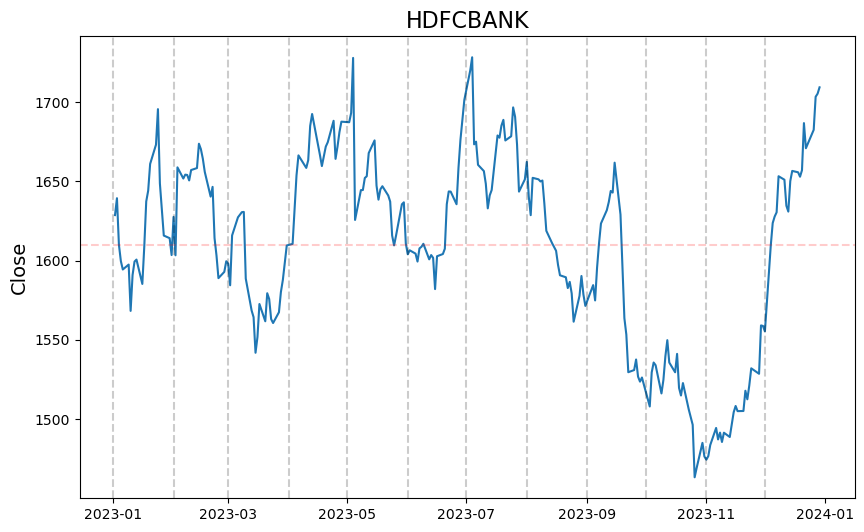

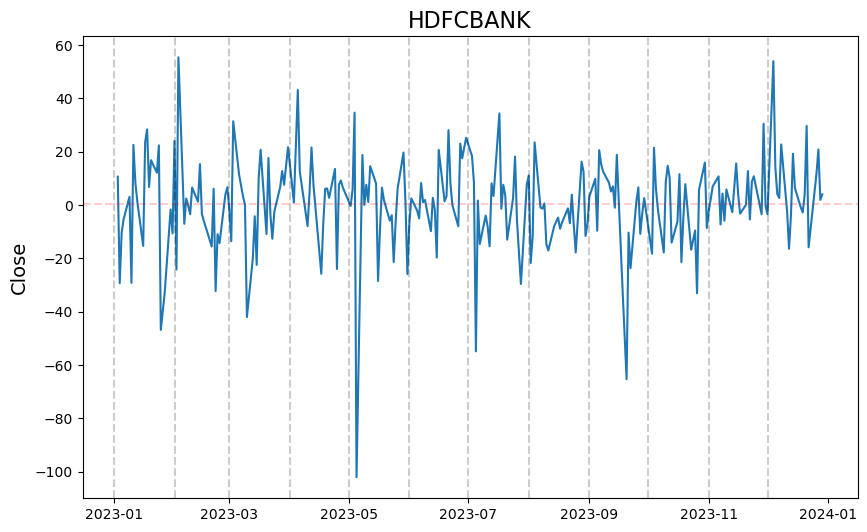

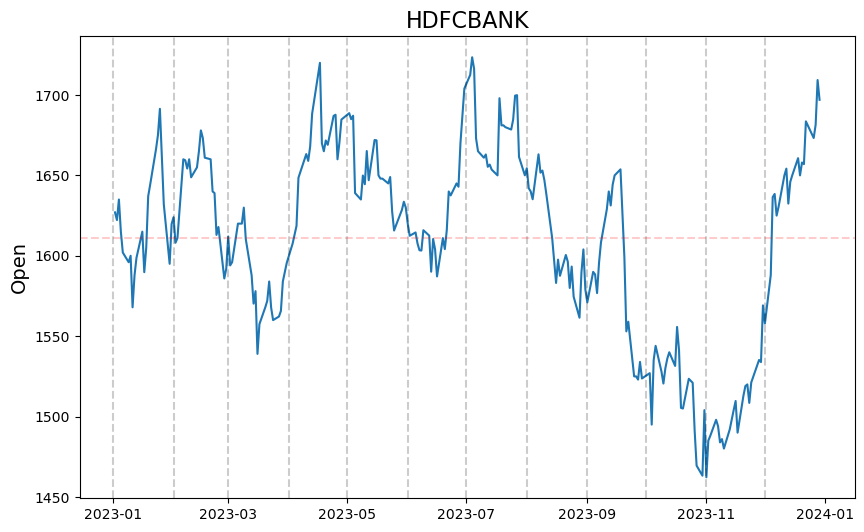

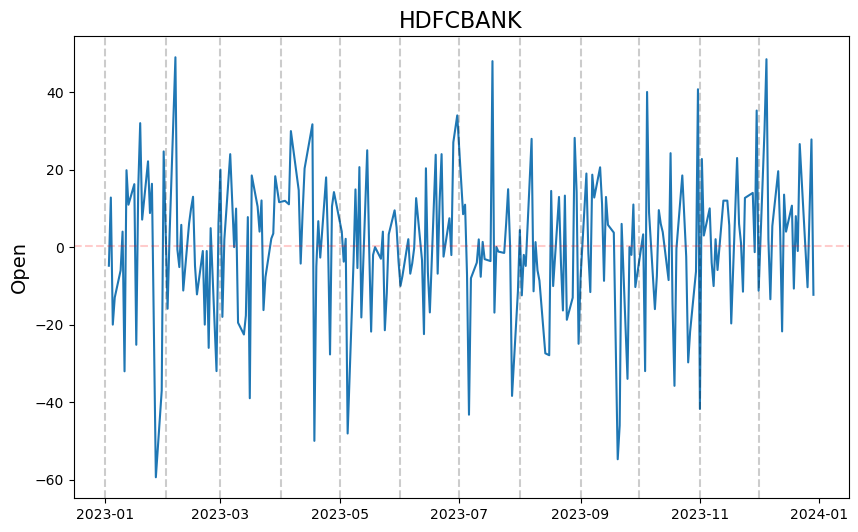

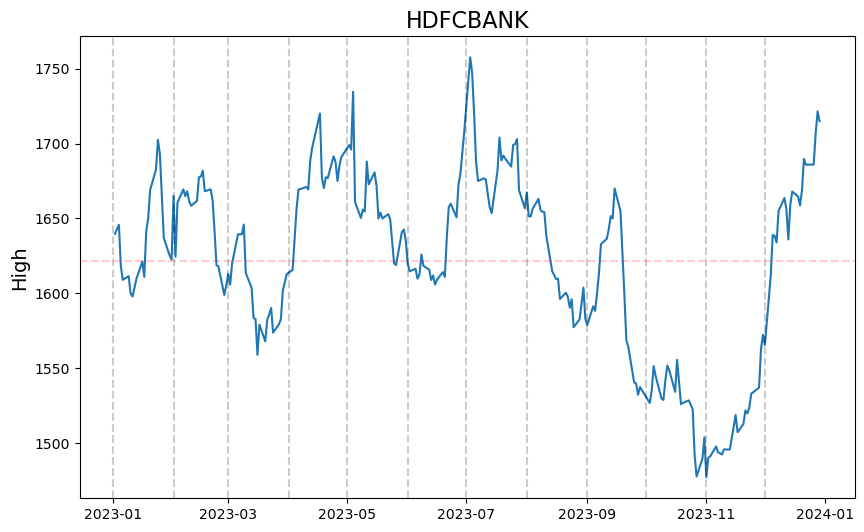

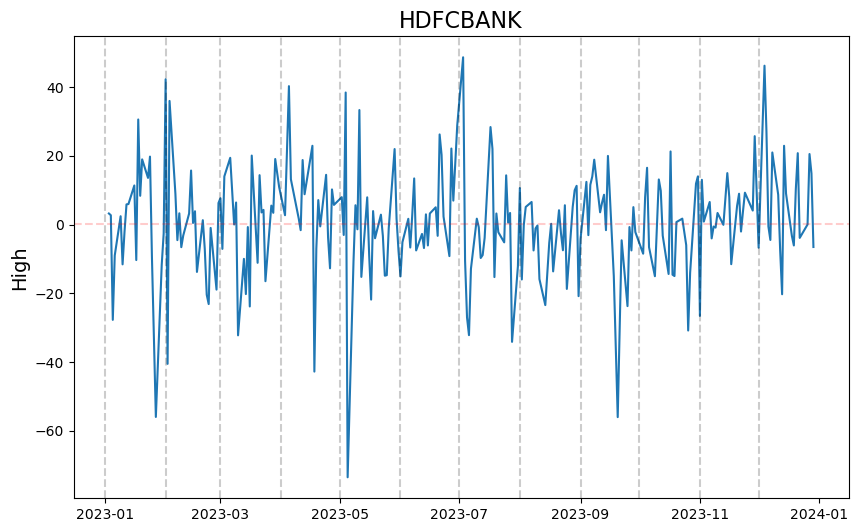

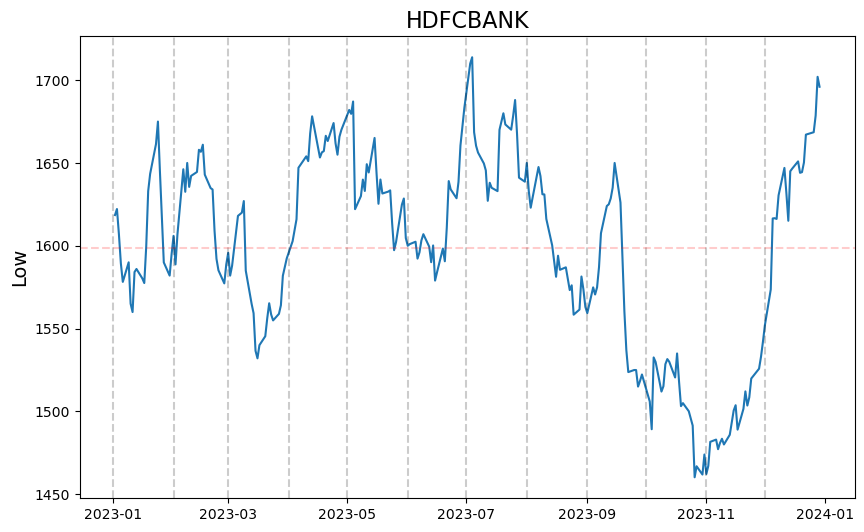

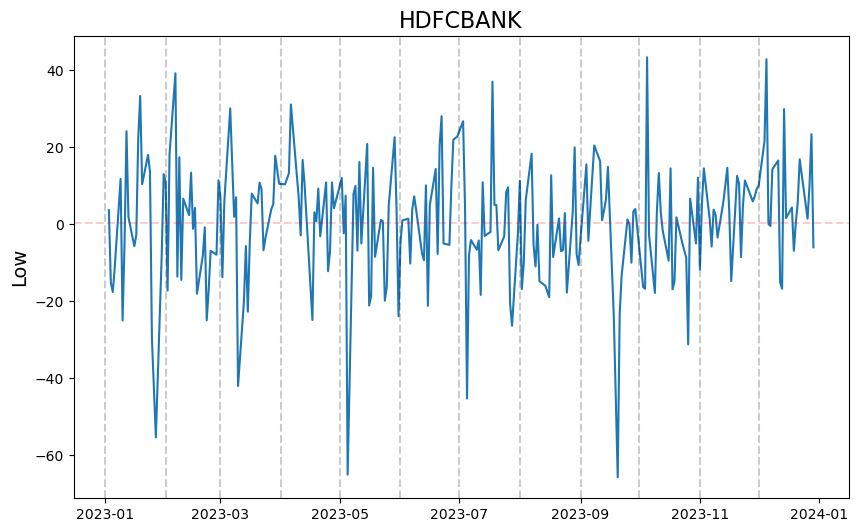

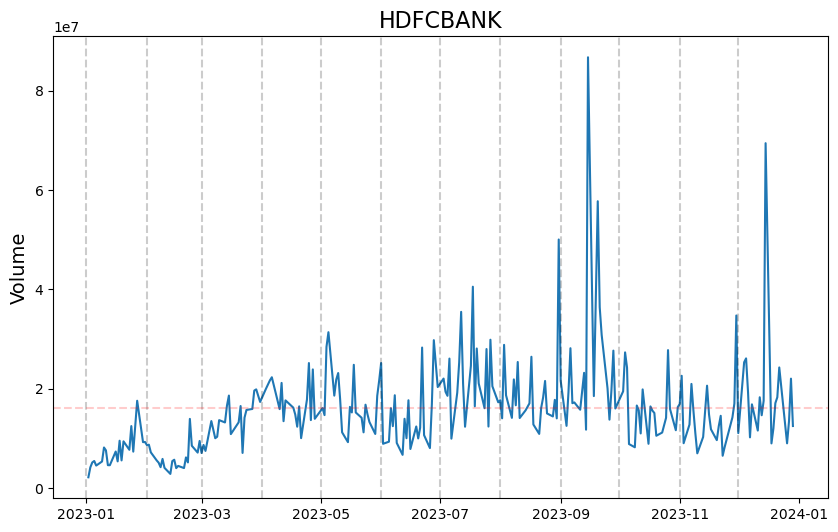

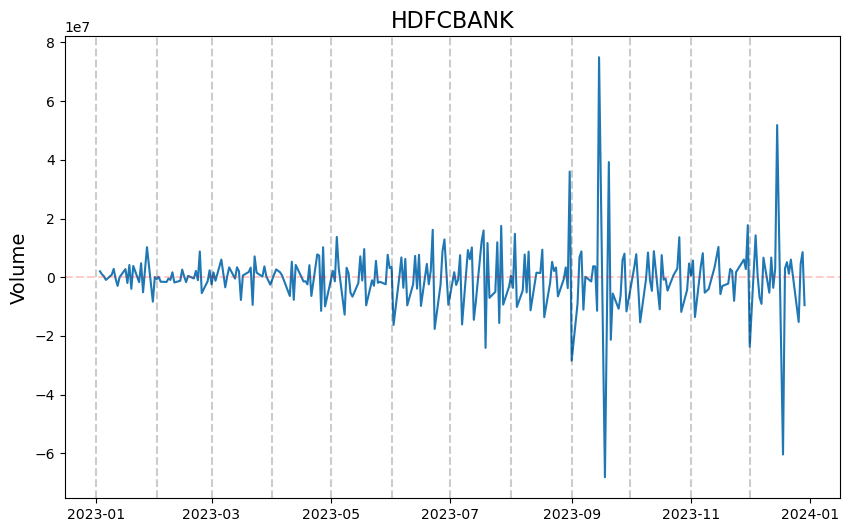

In [10]:
terms = ['Close','Open','High','Low','Volume']
first_diff_terms = []

for term in terms:
    price = prices[term]
    plot_true(price,term)
    first_diff = diff1(price)
    plot_diff1(first_diff,term)
    first_diff_terms.append(first_diff)


## Stationarity check (ADF)

In [11]:
from statsmodels.tsa.stattools import adfuller

def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])



In [12]:
for first_diff in first_diff_terms:    
    perform_adf_test(first_diff)

ADF Statistic: -15.640151
p-value: 0.000000
ADF Statistic: -12.184871
p-value: 0.000000
ADF Statistic: -14.530530
p-value: 0.000000
ADF Statistic: -11.339348
p-value: 0.000000
ADF Statistic: -6.594505
p-value: 0.000000


# ARIMA

## ACF PACF tests

In [13]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

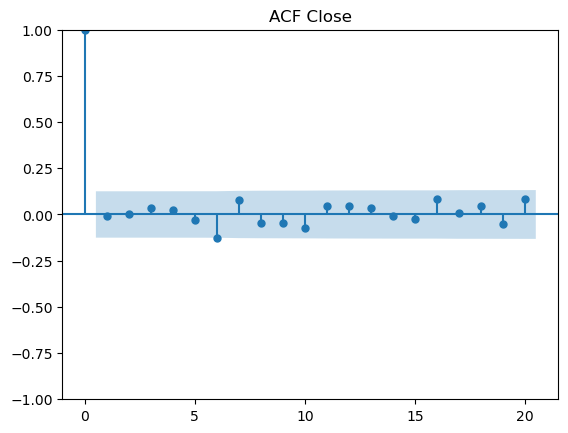

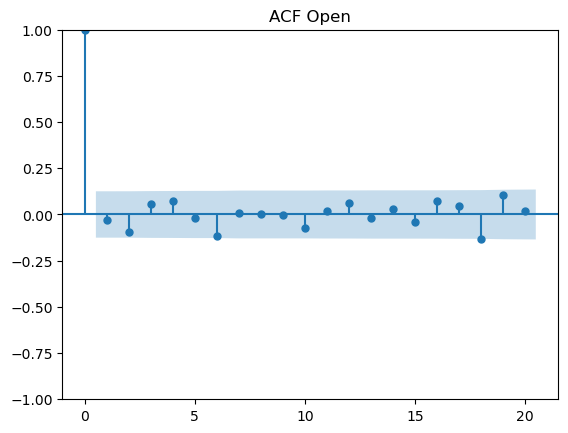

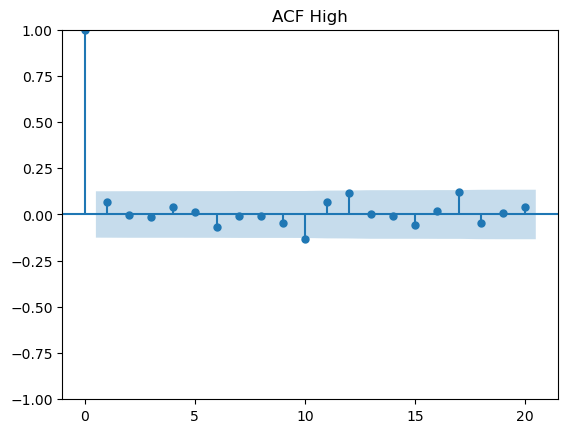

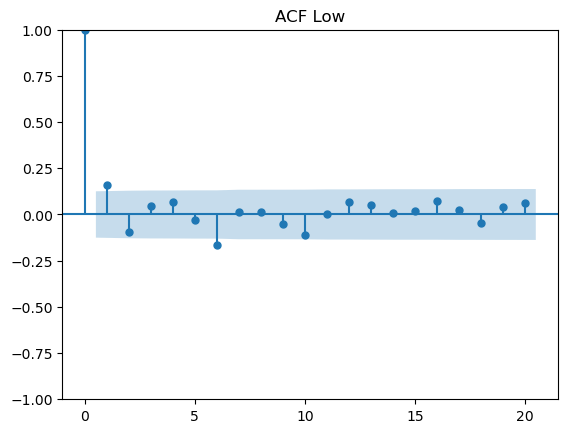

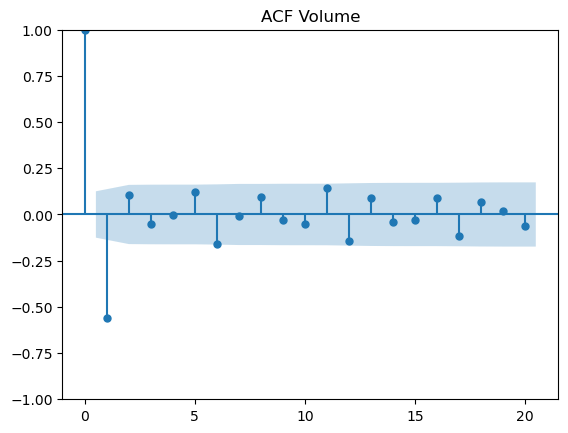

In [14]:
for i in range(len(terms)):
    num_lags = 20
    acf_vals = plot_acf(first_diff_terms[i],lags = num_lags)
    plt.title("ACF {}".format(terms[i]))

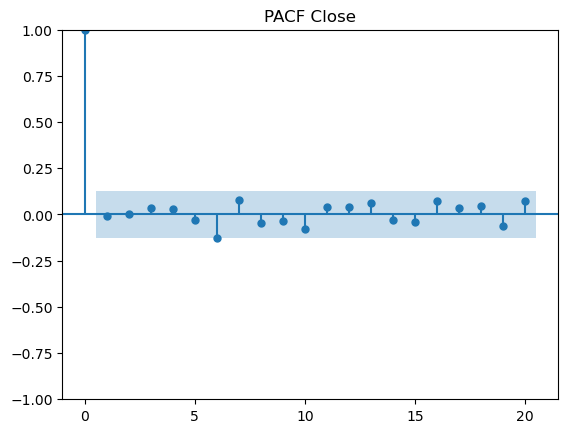

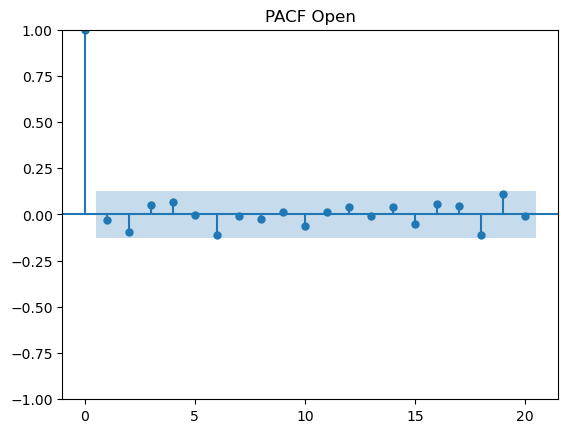

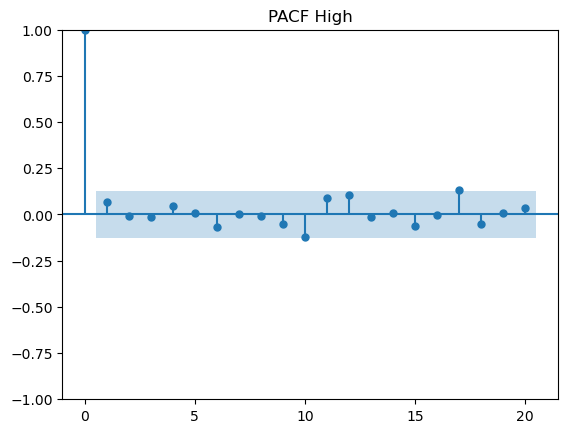

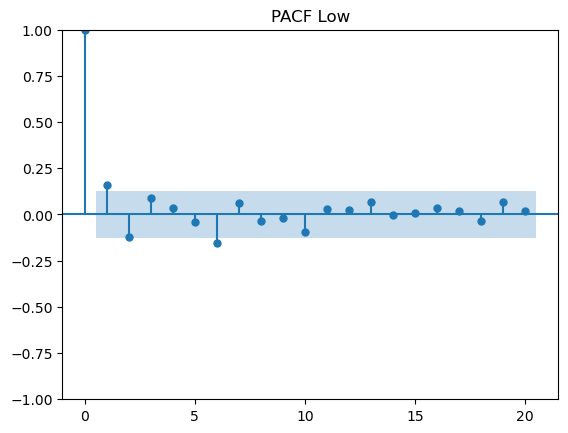

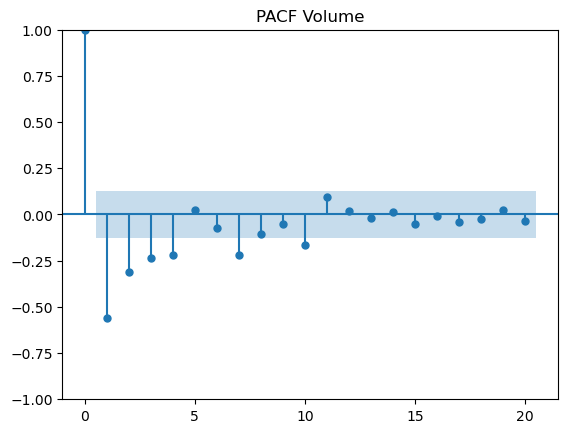

In [15]:
for i in range(len(terms)):
    num_lags = 20
    acf_vals = plot_pacf(first_diff_terms[i],lags = num_lags)
    plt.title("PACF {}".format(terms[i]))

## Get training and testing sets

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA


In [17]:
train_end = datetime(2023,10,30)
test_end = datetime(2023,12,31)

train_data = prices[:train_end]
test_data = prices[train_end + timedelta(days=1):test_end]

In [18]:
prices

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,1627.000000,1639.750000,1618.550049,1628.699951,1610.234009,2190689
2023-01-03,1622.199951,1643.000000,1622.199951,1639.349976,1620.763184,4189015
2023-01-04,1635.000000,1645.750000,1607.000000,1610.050049,1591.795532,5175800
2023-01-05,1615.000000,1618.050049,1589.400024,1599.699951,1581.562744,5470718
2023-01-06,1602.000000,1609.099976,1578.199951,1594.400024,1576.322876,4546231
...,...,...,...,...,...,...
2023-12-22,1683.599976,1685.900024,1667.099976,1670.849976,1670.849976,24289425
2023-12-26,1673.250000,1685.949951,1668.550049,1682.449951,1682.449951,9022928
2023-12-27,1681.500000,1706.500000,1678.599976,1703.300049,1703.300049,13504539


## Fit the ARIMA Model

In [19]:
from time import time

In [20]:
pqd = [(6,1,1),(6,1,6),(10,1,10),(2,1,6),(1,1,1)]

In [21]:
# def fit_normal():
#     pass

In [22]:
# def model_fitting(term,pqd):    
#     model = ARIMA(train_data[term].dropna(), order=pqd)
#     #fit the model
#     start = time()
#     model_fit = model.fit()
#     end = time()
#     print('Model Fitting Time:', end - start)
#     print(model_fit.summary())
#     return model_fit

## Method - 1: Predicting far values

In [23]:
# import pandas as pd

# def fit_normal(model_fit,test_data):
#     try:
#         predictions = model_fit.forecast(len(test_data))
#     except (ValueError, TypeError) as e:
#         print(f"Error in generating predictions: {e}")
#         # Handle the specific exception as needed

#     # Check for NaN values in the predictions
#     if pd.Series(predictions).isna().any():
#         print("NaN values found in predictions. Handle missing values appropriately.")
#     else:
#         # Create a pandas Series with the predictions, using the same index as the test data
#         predictions = pd.Series(predictions, index=test_data.index)

#         # Calculate residuals by subtracting the predicted values from the actual values
#         residuals = test_data - predictions

#     return predictions, residuals


In [24]:
# def plot_residuals(term,residuals):
#     plt.figure(figsize=(10,4))
#     plt.plot(residuals)
#     plt.axhline(0, linestyle='--', color='k')
#     plt.title('Residuals from ARIMA Model for {}'.format(term), fontsize=20)
#     plt.ylabel('Error', fontsize=16)

In [25]:
# def plot_predictions(prices,predictions,residuals,term):
#     plt.figure(figsize=(10,4))

#     plt.plot(prices)
#     plt.plot(predictions)

#     plt.legend(('Data', 'Predictions'), fontsize=16)

#     plt.title('HDFCBANK', fontsize=20)
#     plt.ylabel('{}'.format(term), fontsize=16)
#     for month in range(start_date.month,1+end_date.month):
#         plt.axvline(pd.to_datetime('2023-' + str(month) +'-01'  ), color='k', linestyle='--', alpha=0.2)
#     print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))
#     print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))
    

In [26]:
# for i in range(len(terms)):
#     model_fit = model_fitting(terms[i],pqd[i])
#     predictions , residuals = fit_normal(model_fit,test_data[terms[i]])
#     plot_residuals(terms[i],residuals)
#     plot_predictions(prices[terms[i]],predictions,residuals,terms[i])

## Method - 2 : Using the Rolling Forecast Origin

In [27]:
def rolling_fit_prediction(pqd,train_data,test_data,term):
    rolling_predictions = test_data.copy()
    for train_end in test_data.index:
        train_data = prices[term][:train_end-timedelta(days=1)]
        model = ARIMA(train_data, order=pqd)
        model_fit = model.fit()

        pred = model_fit.forecast()
        rolling_predictions[train_end] = pred

    rolling_residuals = test_data - rolling_predictions
    return rolling_predictions,rolling_residuals

In [28]:
def plot_rolling_residuals(rolling_residuals,term):
    plt.figure(figsize=(10,4))
    plt.plot(rolling_residuals)
    plt.axhline(0, linestyle='--', color='k')
    plt.title('Rolling Forecast Residuals from ARIMA Model {}'.format(term), fontsize=20)
    plt.ylabel('Error', fontsize=16)
    plt.show()

In [29]:
def plot_rolling_predictions(rolling_predictions,term):
    plt.figure(figsize=(10,4))

    plt.plot(prices[term])
    plt.plot(rolling_predictions)

    plt.legend(('Data', 'Predictions'), fontsize=16)

    plt.title('HDFCBANK', fontsize=20)
    plt.ylabel('{}'.format(term), fontsize=16)
    for month in range(start_date.month,1+end_date.month):
        plt.axvline(pd.to_datetime('2023-' + str(month) +'-01'  ), color='k', linestyle='--', alpha=0.2)

    plt.show()
    

        

In [ ]:
for i in range(len(terms)):
    rolling_predictions,rolling_residuals = rolling_fit_prediction(pqd[i],train_data[terms[i]],test_data[terms[i]],terms[i])
    plot_rolling_residuals(rolling_residuals,terms[i])
    plot_rolling_predictions(rolling_predictions,terms[i])
    print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data[terms[i]])),4) * 100 , '%')
    print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

# LSTM

In [31]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
# import keras
# from tensorflow import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.layers import GRU
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [32]:
df=pd.read_csv('TweetsScrape/Tweets+prices.csv')

In [33]:
df

,Unnamed: 0,Negative,Neutral,Positive,Open,High,Low,Close,Volume,next_close
0,2023-01-02,0.232079,0.626984,0.140937,1627.000000,1639.750000,1618.550049,1628.699951,2190689.0,1639.349976
1,2023-01-03,0.175556,0.608149,0.216295,1622.199951,1643.000000,1622.199951,1639.349976,4189015.0,1610.050049
2,2023-01-04,0.175556,0.608149,0.216295,1635.000000,1645.750000,1607.000000,1610.050049,5175800.0,1599.699951
3,2023-01-05,0.193220,0.613401,0.193379,1615.000000,1618.050049,1589.400024,1599.699951,5470718.0,1594.400024
4,2023-01-06,0.235863,0.601486,0.162651,1602.000000,1609.099976,1578.199951,1594.400024,4546231.0,1594.400024
...,...,...,...,...,...,...,...,...,...,...
358,2023-12-26,0.228904,0.590769,0.180327,1673.250000,1685.949951,1668.550049,1682.449951,9022928.0,1703.300049
359,2023-12-27,0.116304,0.667405,0.216291,1681.500000,1706.500000,1678.599976,1703.300049,13504539.0,1705.250000
360,2023-12-28,0.116304,0.667405,0.216291,1709.300049,1721.400024,1702.000000,1705.250000,22038235.0,1709.250000
361,2023-12-29,0.107845,0.597349,0.294805,1697.000000,1714.900024,1696.000000,1709.250000,12505713.0,1709.250000


In [34]:
x=['Negative','Neutral','Positive','Open','High','Low','Close','Volume']
y=['next_close']
X=df[x].values
y=df[y].values

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1))

In [36]:
train_size = int(len(df) * 0.8)

In [37]:
X.shape

(363, 8)

In [38]:
y.shape

(363, 1)

In [39]:
X_train, X_test = X[:train_size, :],X[train_size:, :]
y_train, y_test = y[:train_size], y[train_size:]

In [40]:
X_train = X_train.reshape((X_train.shape[0], 1,
X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1,
X_test.shape[1]))

In [41]:
X_train.shape

(290, 1, 8)

In [42]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(filters=16, kernel_size=2, padding='same', activation='gelu', input_shape = (X_train.shape[1],
X_train.shape[2])))
model.add(tf.keras.layers.LSTM(units=32,activation='gelu', kernel_initializer='he_normal', return_sequences=True))
model.add(tf.keras.layers.LSTM(units=16,activation='gelu', kernel_initializer='he_normal', return_sequences=False))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=16, activation='tanh'))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 16)             272       
                                                                 
 lstm (LSTM)                 (None, 1, 32)             6272      
                                                                 
 lstm_1 (LSTM)               (None, 16)                3136      
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 9969 (38.94 KB)
Trainable params: 9969 (38

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse', 'mae']) 

In [44]:
history = model.fit(X_train, y_train, epochs=100, batch_size=4,  verbose=1)

Epoch 1/100


73/73 [==============================] - 8s 5ms/step - loss: 0.1469 - mse: 0.1469 - mae: 0.3182
Epoch 2/100
73/73 [==============================] - 0s 5ms/step - loss: 0.0140 - mse: 0.0140 - mae: 0.0935
Epoch 3/100
73/73 [==============================] - 0s 5ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0746
Epoch 4/100
73/73 [==============================] - 0s 5ms/step - loss: 0.0078 - mse: 0.0078 - mae: 0.0679
Epoch 5/100
73/73 [==============================] - 0s 7ms/step - loss: 0.0071 - mse: 0.0071 - mae: 0.0670
Epoch 6/100
73/73 [==============================] - 1s 8ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0629
Epoch 7/100
73/73 [==============================] - 0s 5ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0610
Epoch 8/100
73/73 [==============================] - 0s 5ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0604
Epoch 9/100
73/73 [==============================] - 1s 8ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0551
Epoch 10/100
73/73 [======

In [45]:
y_predict = model.predict(X_test)

3/3 [==============================] - 1s 5ms/step


In [46]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_predict)

In [47]:
mse

0.003524506487944816

In [48]:
y_predict_1 = scaler.inverse_transform(y_predict)

In [49]:
y_test_1=scaler.inverse_transform(y_test)

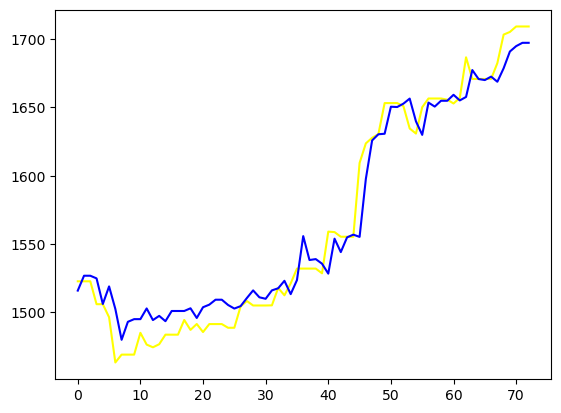

In [50]:
plt.plot(y_test_1,color='yellow')
plt.plot(y_predict_1,color='blue')

In [51]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test_1,y_predict_1)
rmse = np.sqrt(mse)
rmse

15.720515465661872

In [52]:
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test_1,y_predict_1)
mape

0.007689444221598751

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test_1, y_predict_1)

0.9619778655286918

In [54]:
# model.save("my_model(10.83).h5")